In [10]:
import numpy as np
import os
import pickle as pkl
import bz2
import tensorflow as tf
import pathlib

from matplotlib import pyplot as plt
from PIL import Image
from IPython.display import display
from IPython.display import Image as IPImage

from object_detection.utils import ops as utils_ops
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as vis_util

print(tf.__version__)

# patch tf1 into `utils.ops`
utils_ops.tf = tf.compat.v1

# Patch the location of gfile
tf.gfile = tf.io.gfile

# Feats are 0-indexed
FEATS = pathlib.Path("/vol/bitbucket/ocaglaya/cc_feats/faster_rcnn_inception_resnet_v2_atrous_oid_v4_2018_12_12_ghconfig_reexport")
# Imgs are 1-indexed
IMGS = pathlib.Path("/data/ozan/datasets/conceptual_captions/raw_files/images")

2.1.0


In [8]:
def load_pkl(fname):
    with bz2.BZ2File(fname, 'rb') as f:
        return pkl.load(f)

## Loading label map

In [9]:
# List of the strings that is used to add correct label for each box.
PATH_TO_LABELS = '/home/ozan/git/tf-models/research/object_detection/data/oid_v4_label_map.pbtxt'
category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS, use_display_name=True)
print(f'Number of labels: {len(category_index)}')

Number of labels: 601


In [10]:
def run_inference_for_single_image(model, image):
  image = np.asarray(image)

  # Run inference
  output_dict = model(input_tensor)

  # All outputs are batches tensors.
  # Convert to numpy arrays, and take index [0] to remove the batch dimension.
  # We're only interested in the first num_detections.
  num_detections = int(output_dict.pop('num_detections'))
  output_dict = {key:value[0, :num_detections].numpy() 
                 for key,value in output_dict.items()}
  output_dict['num_detections'] = num_detections

  # detection_classes should be ints.
  output_dict['detection_classes'] = output_dict['detection_classes'].astype(np.int64)

    
  return output_dict

Run it on each test image and show the results:

In [11]:
def visualize(img_order, image_path, img_file_offset=1):
  vis_util.visualize_boxes_and_labels_on_image_array(
      image_np,
      output_dict['detection_boxes'],
      output_dict['detection_classes'],
      output_dict['detection_scores'],
      category_index,
      instance_masks=None,
      use_normalized_coordinates=True,
      line_thickness=8)

  display(Image.fromarray(np.array(Image.open(image_path))))

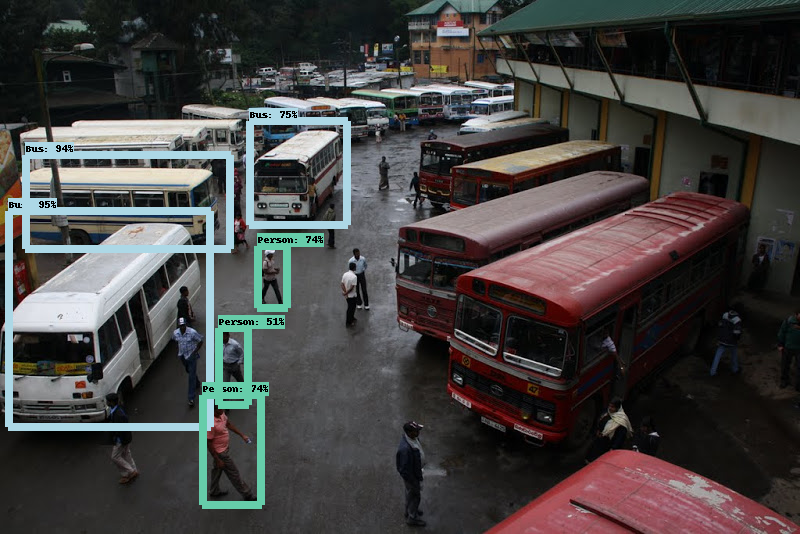

In [12]:
show_inference(detection_model, '/tmp/0.jpg')